In [1]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.dataloaders import GalaxyDataLoader, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures, plot_cosinor, plot_sleep_predictions, plot_non_wear

%load_ext autoreload
%autoreload 2

In [2]:
reload_galaxy = False

In [3]:
preprocess_args = {
    'autocalib_tol': 10e-15,
    'autocalib_max_iter': 500,
    'autocalib_epoch_size': 20,
    'autocalib_sd_criter': 1650,
    'autocalib_mean_criter': 2,
    'autocalib_sphere_crit': 1,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_detection_std_threshold': 10e-8,
    'wear_detection_range_threshold': 10e-8
}

In [4]:
if reload_galaxy:
    galaxy_loader = GalaxyDataLoader(gw_file_dir='../data/smartwatch/GalaxyWatch_Case1_long/', preprocess=True, preprocess_args=preprocess_args)
    galaxy_loader.load_data(verbose=True)
    with open("pickle/galaxy_loader.pkl", "wb") as file:
        pickle.dump(galaxy_loader, file)
else:
    with open("pickle/galaxy_loader.pkl", "rb") as file:
        galaxy_loader = pickle.load(file)

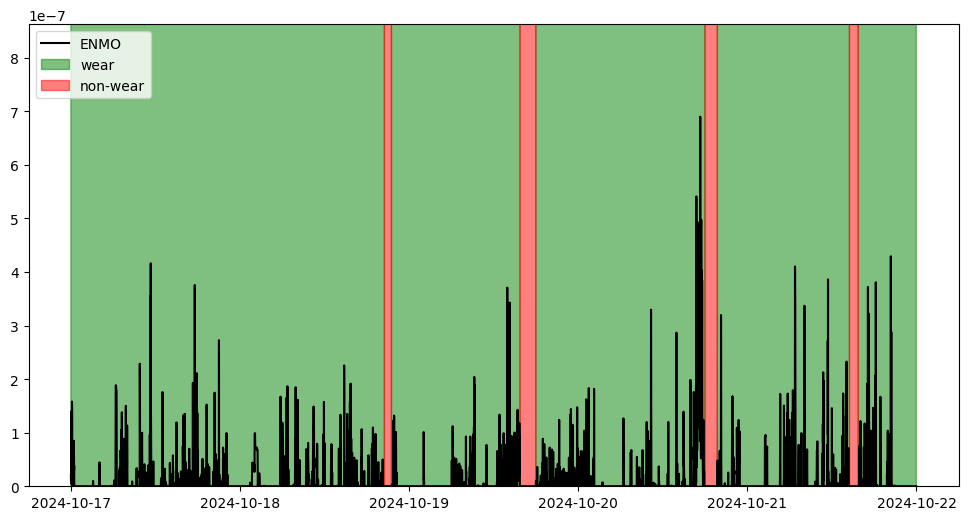

In [5]:
plot_enmo(galaxy_loader)

In [6]:
galaxy_loader.get_meta_data()

{'datasource': 'samsung galaxy watch',
 'raw_n_timesteps': 24921000,
 'raw_n_days': 16,
 'raw_start_datetime': Timestamp('2024-10-10 12:47:06.743000'),
 'raw_end_datetime': Timestamp('2024-10-25 22:59:58.986000'),
 'raw_frequency': 'irregular (~25Hz)',
 'raw_datatype': 'accelerometer',
 'raw_unit': '',
 'resampled_n_timestamps': 10800000,
 'resampled_n_days': 5,
 'resampled_start_datetime': Timestamp('2024-10-17 00:00:00'),
 'resampled_end_datetime': Timestamp('2024-10-21 23:59:59.960000'),
 'resampled_frequency': '25Hz',
 'resampled_datatype': 'accelerometer',
 'resampled_unit': '',
 'calibration_initial_error': 3857.5441070046513,
 'calibration_final_error': 1.0754162319376583e-07,
 'calibration_offset': array([-1.30055721e+09, -5.01169687e+09, -1.72056980e+09]),
 'calibration_scale': array([3.14921782e-10, 1.52794887e-10, 2.88183389e-10]),
 'resampled_total_time': 431999.96,
 'resampled_wear_time': 409500.0,
 'resampled_non-wear_time': 22499.96000000002,
 'preprocessed_n_timesteps':

In [7]:
galaxy_loader.enmo_df[['ENMO']] = galaxy_loader.enmo_df[['ENMO']]*10e7
plot_enmo(galaxy_loader)

KeyError: "None of [Index(['X', 'Y', 'Z'], dtype='object')] are in the [columns]"

/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=False)


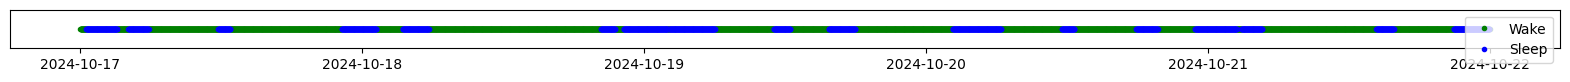

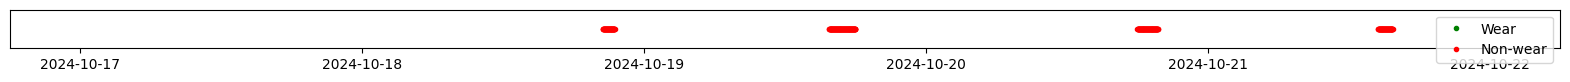

In [8]:
features = WearableFeatures(galaxy_loader)
features.run()
plot_sleep_predictions(features, simple=True)
plot_non_wear(features, simple=True)

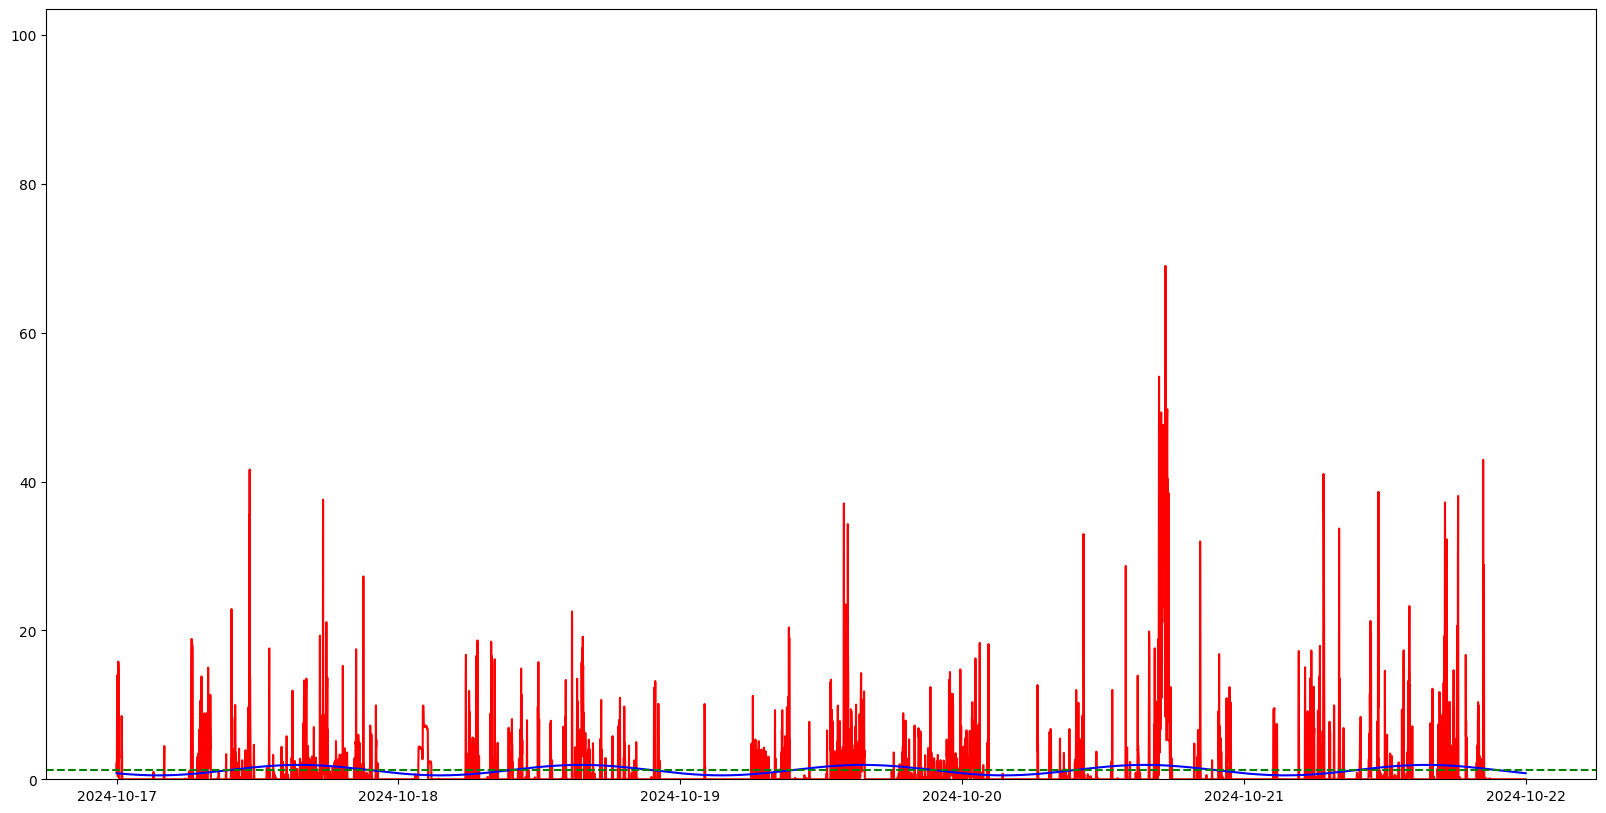

In [9]:
plot_cosinor(features, multiday=True)

In [10]:
features.get_cosinor_features()[1]

{'MESOR': 1.2305636030855236,
 'amplitude': 0.7026553622541715,
 'acrophase': 4.075104975640503,
 'acrophase_time': 15.565754411797535}

In [11]:
features.enmo

,ENMO,wear,date,cosinor_by_day_fitted,time,cos,sin,cosinor_multiday_fitted,sleep
TIMESTAMP,,,,,,,,,
2024-10-17 00:00:00,2.087882,100000000.0,2024-10-17,0.600160,1,0.999990,4.363309e-03,0.810013,0
2024-10-17 00:01:00,1.021710,100000000.0,2024-10-17,0.599497,2,0.999962,8.726535e-03,0.807561,0
2024-10-17 00:02:00,3.815224,100000000.0,2024-10-17,0.598842,3,0.999914,1.308960e-02,0.805117,0
2024-10-17 00:03:00,13.967397,100000000.0,2024-10-17,0.598196,4,0.999848,1.745241e-02,0.802681,0
2024-10-17 00:04:00,3.217869,100000000.0,2024-10-17,0.597558,5,0.999762,2.181489e-02,0.800253,0
...,...,...,...,...,...,...,...,...,...
2024-10-21 23:55:00,0.000000,100000000.0,2024-10-21,0.691701,7196,0.999848,-1.745241e-02,0.822393,1
2024-10-21 23:56:00,0.000000,100000000.0,2024-10-21,0.690860,7197,0.999914,-1.308960e-02,0.819901,1
2024-10-21 23:57:00,0.000000,100000000.0,2024-10-21,0.690029,7198,0.999962,-8.726535e-03,0.817417,1
